In [1]:
### Project inspired by:

### https://docs.google.com/forms/d/e/1FAIpQLSc16Ze7Z1R3MHVICZej66PqekkKk97Z8MwdrtgJEJ0FCNljQQ/viewform
### https://www.fairdistrictsohio.org/mapcompetition
### https://docs.google.com/document/d/e/2PACX-1vTcEUKCz9-YKzJlGF_ljZjj6j2JPafdm7ZYv7SnNPKltFjm7CPMTV_BSYRyEjShaQ/pub

Goal: create 2021 congressional districts for Ohio with MCMC

Jan. 2022

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import maup
import pandas as pd
import geopandas as gp
import numpy as np
import re
from statistics import mean, median
import random

**Load data**

In [2]:
blockgrp_shp = gp.read_file("./raw-data/OH_2020_census_BG/oh_pl2020_bg.shp")
blocks = gp.read_file("./raw-data/OH_2020_census_blocks/oh_pl2020_b.shp")
prec_2020 = gp.read_file("./raw-data/oh_vest_2020/oh_vest_20.shp")

In [3]:
blockgrp_shp = blockgrp_shp.to_crs(epsg=4326)
blocks = blocks.to_crs(epsg=4326)
prec_2020 = prec_2020.to_crs(epsg=4326)


blockgrp_shp["geometry"] = blockgrp_shp.buffer(0)
prec_2020["geometry"] = prec_2020.buffer(0)
blocks["geometry"] = blocks.buffer(0)

### Add population data to precincts

In [4]:
pieces = maup.intersections(blocks, prec_2020, area_cutoff=0)

In [5]:
# Weight by prorated population from blocks
weights = blocks["P0030001"].groupby(maup.assign(blocks, pieces)).sum()

In [6]:
weights = maup.normalize(weights, level=0)

In [7]:
columns = ['P0010001',
 'P0010002',
 'P0010003',
 'P0010004',
 'P0010005',
 'P0010006',
 'P0010007',
 'P0010008',
 'P0010009',
 'P0010010',
 'P0010011',
 'P0010012',
 'P0010013',
 'P0010014',
 'P0010015',
 'P0010016',
 'P0010017',
 'P0010018',
 'P0010019',
 'P0010020',
 'P0010021',
 'P0010022',
 'P0010023',
 'P0010024',
 'P0010025',
 'P0010026',
 'P0010027',
 'P0010028',
 'P0010029',
 'P0010030',
 'P0010031',
 'P0010032',
 'P0010033',
 'P0010034',
 'P0010035',
 'P0010036',
 'P0010037',
 'P0010038',
 'P0010039',
 'P0010040',
 'P0010041',
 'P0010042',
 'P0010043',
 'P0010044',
 'P0010045',
 'P0010046',
 'P0010047',
 'P0010048',
 'P0010049',
 'P0010050',
 'P0010051',
 'P0010052',
 'P0010053',
 'P0010054',
 'P0010055',
 'P0010056',
 'P0010057',
 'P0010058',
 'P0010059',
 'P0010060',
 'P0010061',
 'P0010062',
 'P0010063',
 'P0010064',
 'P0010065',
 'P0010066',
 'P0010067',
 'P0010068',
 'P0010069',
 'P0010070',
 'P0010071',
 'P0020001',
 'P0020002',
 'P0020003',
 'P0020004',
 'P0020005',
 'P0020006',
 'P0020007',
 'P0020008',
 'P0020009',
 'P0020010',
 'P0020011',
 'P0020012',
 'P0020013',
 'P0020014',
 'P0020015',
 'P0020016',
 'P0020017',
 'P0020018',
 'P0020019',
 'P0020020',
 'P0020021',
 'P0020022',
 'P0020023',
 'P0020024',
 'P0020025',
 'P0020026',
 'P0020027',
 'P0020028',
 'P0020029',
 'P0020030',
 'P0020031',
 'P0020032',
 'P0020033',
 'P0020034',
 'P0020035',
 'P0020036',
 'P0020037',
 'P0020038',
 'P0020039',
 'P0020040',
 'P0020041',
 'P0020042',
 'P0020043',
 'P0020044',
 'P0020045',
 'P0020046',
 'P0020047',
 'P0020048',
 'P0020049',
 'P0020050',
 'P0020051',
 'P0020052',
 'P0020053',
 'P0020054',
 'P0020055',
 'P0020056',
 'P0020057',
 'P0020058',
 'P0020059',
 'P0020060',
 'P0020061',
 'P0020062',
 'P0020063',
 'P0020064',
 'P0020065',
 'P0020066',
 'P0020067',
 'P0020068',
 'P0020069',
 'P0020070',
 'P0020071',
 'P0020072',
 'P0020073',
 'P0030001',
 'P0030002',
 'P0030003',
 'P0030004',
 'P0030005',
 'P0030006',
 'P0030007',
 'P0030008',
 'P0030009',
 'P0030010',
 'P0030011',
 'P0030012',
 'P0030013',
 'P0030014',
 'P0030015',
 'P0030016',
 'P0030017',
 'P0030018',
 'P0030019',
 'P0030020',
 'P0030021',
 'P0030022',
 'P0030023',
 'P0030024',
 'P0030025',
 'P0030026',
 'P0030027',
 'P0030028',
 'P0030029',
 'P0030030',
 'P0030031',
 'P0030032',
 'P0030033',
 'P0030034',
 'P0030035',
 'P0030036',
 'P0030037',
 'P0030038',
 'P0030039',
 'P0030040',
 'P0030041',
 'P0030042',
 'P0030043',
 'P0030044',
 'P0030045',
 'P0030046',
 'P0030047',
 'P0030048',
 'P0030049',
 'P0030050',
 'P0030051',
 'P0030052',
 'P0030053',
 'P0030054',
 'P0030055',
 'P0030056',
 'P0030057',
 'P0030058',
 'P0030059',
 'P0030060',
 'P0030061',
 'P0030062',
 'P0030063',
 'P0030064',
 'P0030065',
 'P0030066',
 'P0030067',
 'P0030068',
 'P0030069',
 'P0030070',
 'P0030071',
 'P0040001',
 'P0040002',
 'P0040003',
 'P0040004',
 'P0040005',
 'P0040006',
 'P0040007',
 'P0040008',
 'P0040009',
 'P0040010',
 'P0040011',
 'P0040012',
 'P0040013',
 'P0040014',
 'P0040015',
 'P0040016',
 'P0040017',
 'P0040018',
 'P0040019',
 'P0040020',
 'P0040021',
 'P0040022',
 'P0040023',
 'P0040024',
 'P0040025',
 'P0040026',
 'P0040027',
 'P0040028',
 'P0040029',
 'P0040030',
 'P0040031',
 'P0040032',
 'P0040033',
 'P0040034',
 'P0040035',
 'P0040036',
 'P0040037',
 'P0040038',
 'P0040039',
 'P0040040',
 'P0040041',
 'P0040042',
 'P0040043',
 'P0040044',
 'P0040045',
 'P0040046',
 'P0040047',
 'P0040048',
 'P0040049',
 'P0040050',
 'P0040051',
 'P0040052',
 'P0040053',
 'P0040054',
 'P0040055',
 'P0040056',
 'P0040057',
 'P0040058',
 'P0040059',
 'P0040060',
 'P0040061',
 'P0040062',
 'P0040063',
 'P0040064',
 'P0040065',
 'P0040066',
 'P0040067',
 'P0040068',
 'P0040069',
 'P0040070',
 'P0040071',
 'P0040072',
 'P0040073',
 'H0010001',
 'H0010002',
 'H0010003',
 'P0050001',
 'P0050002',
 'P0050003',
 'P0050004',
 'P0050005',
 'P0050006',
 'P0050007',
 'P0050008',
 'P0050009',
 'P0050010']

prec_2020[columns] = maup.prorate(
     pieces,
     blocks[columns],
     weights=weights)

In [8]:
prec_2020[columns].head()

,P0010001,P0010002,P0010003,P0010004,P0010005,P0010006,P0010007,P0010008,P0010009,P0010010,...,P0050001,P0050002,P0050003,P0050004,P0050005,P0050006,P0050007,P0050008,P0050009,P0050010
0,369.0,341.0,256.0,69.0,6.0,3.0,0.0,7.0,28.0,25.0,...,336.0,0.0,0.0,0.0,0.0,0.0,336.0,336.0,0.0,0.0
1,1300.0,1229.0,1156.0,25.0,1.0,34.0,0.0,13.0,71.0,63.0,...,141.0,141.0,126.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1501.0,1389.0,1038.0,21.0,1.0,322.0,0.0,7.0,112.0,106.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1263.0,1188.0,1108.0,23.0,4.0,28.0,0.0,25.0,75.0,65.0,...,49.0,37.0,0.0,0.0,37.0,0.0,12.0,0.0,0.0,12.0
4,1469.0,1389.0,1235.0,12.0,1.0,130.0,0.0,11.0,80.0,80.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
prec_2020.P0010001.sum()

11790197.0

In [10]:
blocks.P0010001.sum()

11799448

### Prorate Election Data from precicnts to Block-Groups

In [11]:
assignment = maup.assign(blockgrp_shp, prec_2020)

In [12]:
# prorate the vote totals according to each block's share of the overall
# precinct population:
weights = blockgrp_shp.P0030001 / assignment.map(prec_2020.P0030001)

In [13]:
variables = ['G20PRERTRU', 'G20PREDBID', 'G20PRELJOR', 'G20PREGHAW']

prorated = maup.prorate(assignment, prec_2020[variables], weights=weights)

In [14]:
# Add the prorated vote totals as columns 
blockgrp_shp[variables] = prorated

blockgrp_shp[variables].round(2).head()

,G20PRERTRU,G20PREDBID,G20PRELJOR,G20PREGHAW
0,61.58,489.60,3.70,2.46
1,395.06,658.44,6.12,0.00
2,202.51,417.58,9.42,4.71
3,175.13,1011.84,0.00,0.00
4,12.63,226.19,0.60,1.20


### make sure Cincinnati and Cleaveland aren't split accross districts

In [15]:
cincinnati = gpd.read_file("./raw-data/cincinatti_bounds/Cincinnati_City_Boundary/Cincinnati_City_Boundary.shp")
cleveland = gpd.read_file("./raw-data/cle_bounds/Cleveland_City_Boundaries_CPC.shp")

cleveland = cleveland.to_crs(epsg=4326)
cincinnati = cincinnati.to_crs(epsg=4326)

In [16]:
from geopandas.tools import sjoin
join_clev = sjoin(blockgrp_shp, cleveland, how="right")
join_cin = sjoin(blockgrp_shp, cincinnati, how="right")

In [17]:
blockgrp_shp['g'] = ''
for i in blockgrp_shp.GEOID20:
    if i in list(join_clev.GEOID20):
        blockgrp_shp.loc[blockgrp_shp['GEOID20'] == i, 'g'] = "1"
    elif i in list(join_cin.GEOID20):
        blockgrp_shp.loc[blockgrp_shp['GEOID20'] == i, 'g'] = "2"
    else:
        blockgrp_shp.loc[blockgrp_shp['GEOID20'] == i, 'g'] = i

In [18]:
# for visualization check
blockgrp_shp['g2'] = ''
for i in blockgrp_shp.GEOID20:
    if i in list(join_clev.GEOID20):
        blockgrp_shp.loc[blockgrp_shp['GEOID20'] == i, 'g2'] = "1"
    elif i in list(join_cin.GEOID20):
        blockgrp_shp.loc[blockgrp_shp['GEOID20'] == i, 'g2'] = "2"
    else:
        blockgrp_shp.loc[blockgrp_shp['GEOID20'] == i, 'g2'] = "3"

In [19]:
blockgrp_shp2 = blockgrp_shp.dissolve(by='g', aggfunc='sum')
blockgrp_shp2 = blockgrp_shp2.reset_index()

<AxesSubplot:>

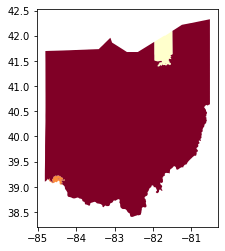

In [20]:
blockgrp_shp.dissolve(by='g2').reset_index().plot(cmap='YlOrRd', column='g2')

### Load Columbus to count number of times it is split

In [21]:
columbus = gpd.read_file('raw-data/columbus_boundaries/Corporate_Boundary/Corporate_Boundary.shp')

columbus = columbus.to_crs(epsg=4326)

<AxesSubplot:>

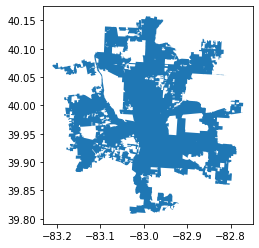

In [22]:
columbus.plot()

In [23]:
join_columbus = sjoin(blockgrp_shp2, columbus, how="right")

In [24]:
blockgrp_shp2['Columbus'] = ''
for i in blockgrp_shp2.g:
    if i in list(join_columbus.g):
        blockgrp_shp2.loc[blockgrp_shp2['g'] == i, 'Columbus'] = 1
    else:
        blockgrp_shp2.loc[blockgrp_shp2['g'] == i, 'Columbus'] = 0

### Add county data

In [25]:
counties = gpd.read_file("./raw-data/ODOT_County_Boundaries/ODOT_County_Boundaries.shp")

counties = counties.to_crs(epsg=4326)

In [26]:
counties = counties[['COUNTY_CD','geometry']]

In [27]:
assign = maup.assign(blockgrp_shp2, counties)

In [28]:
blockgrp_shp2["County"] = assign

In [29]:
blockgrp_shp2 = blockgrp_shp2[~blockgrp_shp2["County"].isna()]

In [30]:
blockgrp_shp2["County"] = blockgrp_shp2.County.astype(int)

### MCMC Prep

In [31]:
import csv
import os
import networkx as nx
from functools import partial
import json
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import maup
from tqdm import tqdm
plt.style.use('ggplot')

from gerrychain import (
    Election,
    Graph,
    MarkovChain,
    Partition,
    accept,
    constraints,
    updaters,
)
from gerrychain.metrics import efficiency_gap, mean_median, partisan_gini
from gerrychain.proposals import recom, propose_random_flip
from gerrychain.updaters import cut_edges, county_splits, CountySplit
from gerrychain.constraints import refuse_new_splits, districts_within_tolerance, contiguous
from gerrychain.tree import recursive_tree_part

In [32]:
# G20PRERTRU -- trump
# G20PREDBID -- biden
blockgrp_shp2['TOTPRE20'] = blockgrp_shp2['G20PRERTRU'] + blockgrp_shp2['G20PREDBID'] + blockgrp_shp2['G20PRELJOR'] + blockgrp_shp2['G20PREGHAW']
blockgrp_shp2['prop_trumpvote'] = round(blockgrp_shp2['G20PRERTRU'] / blockgrp_shp2['TOTPRE20'],4)*100
blockgrp_shp2['prop_bidenvote'] = round(blockgrp_shp2['G20PREDBID'] / blockgrp_shp2['TOTPRE20'],4)*100

blockgrp_shp2['prop_black'] = round(blockgrp_shp2['P0020006'] / blockgrp_shp2['P0010001'],4)*100
blockgrp_shp2['prop_white'] = round(blockgrp_shp2['P0020005'] / blockgrp_shp2['P0010001'],4)*100

blockgrp_shp2["nH_BLACK"] = blockgrp_shp2["P0010001"]-blockgrp_shp2["P0020006"]
blockgrp_shp2["nH_WHITE"] = blockgrp_shp2["P0010001"]-blockgrp_shp2["P0020005"]

In [33]:
state_abbr = "OH"
house = "CG"
state_fip = "39"
num_districts = 15

unique_label = "GEOID20"
pop_col = "P0010001"

In [34]:
blockgrp_shp2.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [35]:
# create graph
graph = Graph.from_geodataframe(blockgrp_shp2)
graph.add_data(blockgrp_shp2,list(blockgrp_shp2))

In [36]:
graph

<Graph [8605 nodes, 23625 edges]>

In [37]:
# population check
pop = 0
for node in graph:
    pop = pop + int(graph.nodes[node]["P0010001"])
pop

11799448

In [38]:
updater = {
    "population": updaters.Tally("P0010001", alias="population"),
    "c_splits":updaters.county_splits("c_splits", 'County'),
    
    "P0020006":Election("P0020006",{"P0020006":"P0020006", "nH_BLACK":"nH_BLACK"}),
    "P0020005":Election("P0020005",{"P0020005":"P0020005", "nH_WHITE":"nH_WHITE"}),
    
    "2020_pres" : Election("2020_pres", {"G20PRERTRU":"G20PRERTRU","G20PREDBID":"G20PREDBID"}, alias="2020_pres")
    
}

In [39]:
start = recursive_tree_part(graph,range(num_districts),round(pop/num_districts),"P0010001", .0079,1)

In [40]:
initial_partition =Partition(graph,start, updater)

<AxesSubplot:>

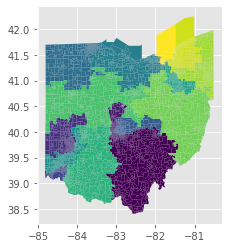

In [41]:
initial_partition.plot()

Note on split contraints with MCMC:

"While neutral ensembles of plans generated from a Markov chain can be effective tools in determining a baseline for various metrics, these ensembles typically split up counties far more than
human-made plans, since they are usually blind to these boundaries. Moreover, it is challenging
even to bias a MCMC run towards less county splittings, since neither ReCom nor flip are particularly well-suited to proposing plans which split counties less. As a result, care must be taken when
using ensemble methods to compare or evaluate these scores."
(https://github.com/vrdi/splitting/blob/master/SplittingReport.pdf p. 6)

### Functions

In [42]:
def num_splits(partition, df=blockgrp_shp2):
    df["current"] = df.index.map(partition.assignment)
    return sum(df.groupby('County')['current'].nunique() >1)
updater.update({"County Splits": num_splits})


def num_county_split_x(partition, df=blockgrp_shp2, x=1):
    # x = number of times county split
    df["current"] = df.index.map(partition.assignment)
    county_splits = df.groupby('County')['current'].nunique().reset_index()
    return county_splits[county_splits.current==x].shape[0]

def columbus_num_splits(partition, df=blockgrp_shp2):
    df["current"] = df.index.map(partition.assignment)
    return sum(df.groupby('Columbus')['current'].nunique() >1)
updater.update({"Columbus Splits": num_splits})

In [64]:
def save_part(part, state, num, as_shp=True):
    '''Save partition as json or shapefile'''

    part.graph.to_json('part_'+state+str(num)+'.json', include_geometries_as_geojson=True)
    
    if as_shp:
        ### Importing GeoJSON into Shapely
        # https://medium.com/@pramukta/recipe-importing-geojson-into-shapely-da1edf79f41d
        import json
        from shapely.geometry import shape, GeometryCollection
        
        with open('part_OH'+str(t)+'.json') as f:
            features = json.load(f)["nodes"]

        geo = GeometryCollection([shape(feature["geometry"]).buffer(0) for feature in features])
        df['geometry'] = geo
        # convert to geodataframe
        gdf = gpd.GeoDataFrame(df, geometry=df['geometry'])
        
        gdf.to_file('part_'+state+str(num)+'.shp')

In [45]:
ideal_population = sum(initial_partition["population"].values()) / len(initial_partition)
ideal_population

786629.8666666667

In [46]:
compactness_bound = constraints.UpperBound(
    lambda p: len(p["cut_edges"]),
    2*len(initial_partition["cut_edges"])
)

In [47]:
proposal = partial(
        recom, pop_col="P0010001", pop_target=pop/num_districts, epsilon=0.01, node_repeats=1)

In [48]:
pop_constraint = constraints.within_percent_of_ideal_population(initial_partition, 0.05)

chain = MarkovChain(
    proposal=proposal,
    constraints=[
        pop_constraint,
        compactness_bound,
        constraints.contiguous,
        constraints.refuse_new_splits('c_splits')
    ],
    accept=accept.always_accept,
    initial_state=initial_partition,
    total_steps=10000,
)

In [49]:
for district, pop in initial_partition["population"].items():
    print("District {}: {}".format(district, pop))

District 0: 787228
District 1: 782150
District 2: 788645
District 3: 789474
District 4: 780846
District 5: 785665
District 6: 787372
District 7: 789830
District 8: 789616
District 9: 780973
District 10: 792682
District 11: 790912
District 12: 784071
District 13: 781319
District 14: 788665


### MCMC

In [50]:
random.seed(9)

In [68]:
population = []

pres20 = []
gov18 = []
mean_medians_pres = []
egs_pres = []

black_prop = []
white_prop = []

dem_seats_pres = []
rep_seats_pres = []
pgini_using_pres_voting = []

num_columbus_splits = []
num_columbus_nosplits = []
num_columbus_split_in_half = []
num_columbus_2splits = []

county_req_met = 0
t = 0
for part in chain.with_progress_bar():
    population.append(part["population"])

    pres20.append(sorted(part["2020_pres"].percents("G20PRERTRU")))
    
    dem_seats_pres.append(part["2020_pres"].wins("G20PREDBID"))
    rep_seats_pres.append(part["2020_pres"].wins("G20PRERTRU"))
    
    mean_medians_pres.append(mean_median(part["2020_pres"]))
    egs_pres.append(efficiency_gap(part["2020_pres"]))
    pgini_using_pres_voting.append(partisan_gini(part["2020_pres"]))
    
    black_prop.append(sorted(part["P0020006"].percents("P0020006"))) # black pop prop
    white_prop.append(sorted(part["P0020005"].percents("P0020005"))) # white pop prop

    ### keeping track of plans that comply with Ohio split laws
    num_columbus_splits.append(columbus_num_splits(part))
    num_columbus_nosplits.append(num_county_split_x(part, x=1)) # 65 or more
    num_columbus_split_in_half.append(num_county_split_x(part, x=2)) # 18 or less
    num_columbus_2splits.append(num_county_split_x(part, x=3)) # 5 or less 
    
    if num_county_split_x(part, x=1)>=65 and num_county_split_x(part, x=2)<=18 and num_county_split_x(part, x=3)<=5 and columbus_num_splits(part)==2:
        county_req_met += 1
        save_part(part, state="OH", num=t, as_shp=False)

    t +=1
    if t%500 ==0:
        print("chain",part,"step",t)


In [ ]:
### run MCMC, analyze plan distributions as they related to race, partisanship, and splits

In [ ]:
### run MCMC and save partitions (potential plans) that comply with Ohio law and exhibit districts.

### Plots

(array([2.000e+00, 4.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 4.000e+00,
        2.000e+00, 4.000e+00, 2.000e+00, 0.000e+00, 1.000e+01, 2.000e+00,
        5.900e+01, 2.000e+00, 8.700e+01, 0.000e+00, 5.100e+01, 2.250e+02,
        1.500e+02, 0.000e+00, 6.140e+02, 1.800e+02, 6.000e+00, 8.400e+01,
        5.300e+01, 0.000e+00, 6.000e+00, 3.208e+03, 2.041e+03, 3.204e+03]),
 array([32. , 32.9, 33.8, 34.7, 35.6, 36.5, 37.4, 38.3, 39.2, 40.1, 41. ,
        41.9, 42.8, 43.7, 44.6, 45.5, 46.4, 47.3, 48.2, 49.1, 50. , 50.9,
        51.8, 52.7, 53.6, 54.5, 55.4, 56.3, 57.2, 58.1, 59. ]),
 <BarContainer object of 30 artists>)

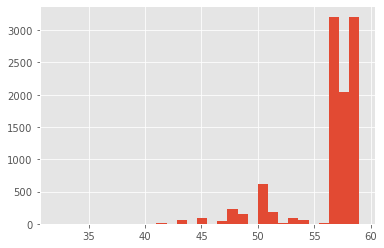

In [241]:
plt.hist(num_columbus_nosplits, density=False, bins=30)  # density=False would make counts

(array([4.000e+00, 7.100e+01, 4.660e+02, 1.208e+03, 1.859e+03, 1.848e+03,
        1.641e+03, 0.000e+00, 9.470e+02, 3.970e+02, 1.350e+02, 8.700e+01,
        1.790e+02, 3.030e+02, 0.000e+00, 3.400e+02, 2.270e+02, 8.900e+01,
        6.400e+01, 5.500e+01, 4.600e+01, 1.700e+01, 0.000e+00, 6.000e+00,
        2.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 5.000e+00, 2.000e+00]),
 array([ 8.        ,  8.86666667,  9.73333333, 10.6       , 11.46666667,
        12.33333333, 13.2       , 14.06666667, 14.93333333, 15.8       ,
        16.66666667, 17.53333333, 18.4       , 19.26666667, 20.13333333,
        21.        , 21.86666667, 22.73333333, 23.6       , 24.46666667,
        25.33333333, 26.2       , 27.06666667, 27.93333333, 28.8       ,
        29.66666667, 30.53333333, 31.4       , 32.26666667, 33.13333333,
        34.        ]),
 <BarContainer object of 30 artists>)

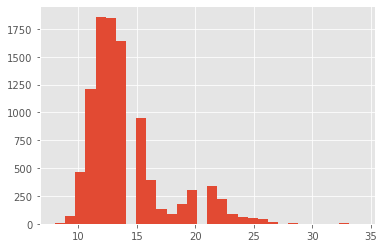

In [245]:
plt.hist(num_columbus_split_in_half, density=False, bins=30)  # density=False would make counts

(array([1.000e+00, 0.000e+00, 7.000e+00, 0.000e+00, 4.300e+01, 0.000e+00,
        2.550e+02, 0.000e+00, 5.560e+02, 0.000e+00, 1.126e+03, 0.000e+00,
        1.635e+03, 0.000e+00, 0.000e+00, 1.938e+03, 0.000e+00, 1.747e+03,
        0.000e+00, 1.370e+03, 0.000e+00, 8.120e+02, 0.000e+00, 3.920e+02,
        0.000e+00, 9.300e+01, 0.000e+00, 2.200e+01, 0.000e+00, 5.000e+00]),
 array([ 6.        ,  6.46666667,  6.93333333,  7.4       ,  7.86666667,
         8.33333333,  8.8       ,  9.26666667,  9.73333333, 10.2       ,
        10.66666667, 11.13333333, 11.6       , 12.06666667, 12.53333333,
        13.        , 13.46666667, 13.93333333, 14.4       , 14.86666667,
        15.33333333, 15.8       , 16.26666667, 16.73333333, 17.2       ,
        17.66666667, 18.13333333, 18.6       , 19.06666667, 19.53333333,
        20.        ]),
 <BarContainer object of 30 artists>)

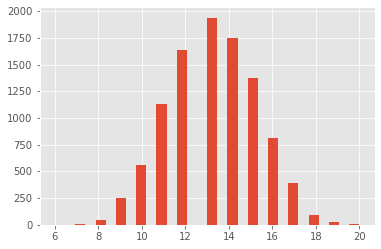

In [244]:
plt.hist(num_columbus_2splits, density=False, bins=30)  # density=False would make counts